<a href="https://colab.research.google.com/github/JuanM-GG/maestria/blob/main/estimacion-parametros/estimacion_parametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd  
import sys

In [3]:
print(sys.path)
# Here you can see that the path to the package is not present

['d:\\DYNAMICAL SIMULATION\\maestria\\maestria\\estimacion-parametros', 'c:\\Users\\juanm\\anaconda3\\python39.zip', 'c:\\Users\\juanm\\anaconda3\\DLLs', 'c:\\Users\\juanm\\anaconda3\\lib', 'c:\\Users\\juanm\\anaconda3', '', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages\\win32', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages\\Pythonwin', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\juanm\\.ipython']


In [ ]:
import utilis.functions as fn
# So it did not find the package

In [5]:
# In order to access the package you need to have its path. The path required is the path WHERE that package is soterd, not it path
sys.path.insert(1, 'd:\\DYNAMICAL SIMULATION\\maestria\\maestria')

In [6]:
print(sys.path)
# Now you can see the path where the packege exists 
# 'd:\\DYNAMICAL SIMULATION\\maestria\\maestria',

['d:\\DYNAMICAL SIMULATION\\maestria\\maestria\\estimacion-parametros', 'd:\\DYNAMICAL SIMULATION\\maestria\\maestria', 'c:\\Users\\juanm\\anaconda3\\python39.zip', 'c:\\Users\\juanm\\anaconda3\\DLLs', 'c:\\Users\\juanm\\anaconda3\\lib', 'c:\\Users\\juanm\\anaconda3', '', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages\\win32', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages\\Pythonwin', 'c:\\Users\\juanm\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\juanm\\.ipython']


In [7]:
import utilis.functions as fn
# And it worked!

In [8]:
fn.euler

<function utilis.functions.euler(f, x0, t0, tf, dt, u, *kargs)>

In [9]:
# Definir parametros 
mu_max = 1.2 # g/L
yxs = 0.2 
ks = 280 # g/L
ypx = 4 

In [10]:
# Definir condiciones iniciales 
x0 = np.array([0.2, 40, 0])
# Definir tiempo de integracion 
tf = 60 
dt = 1 
time = np.arange(0, tf+dt, dt)
# Simular ODEs
x, s, p = fn.euler(fn.monod_model, x0, 0, tf+dt, dt, lambda t: 0, mu_max, yxs, ks, ypx).T

In [11]:
fn.final_conc(x, s, p)

(8.188387294636055, 31.953549178544236, 0.0580635268197149)

(8.185185831258408, 31.94074332503364, 0.07407084370789976)

In [12]:
predicted = fn.generate_data(time, x, s, p)
predicted.head()

,t,x,s,p
0,0,0.200000,40.000000,0.000000
1,1,0.230000,39.850000,0.120000
2,2,0.264387,39.678066,0.257547
3,3,0.303765,39.481174,0.415061
4,4,0.348812,39.255940,0.595248


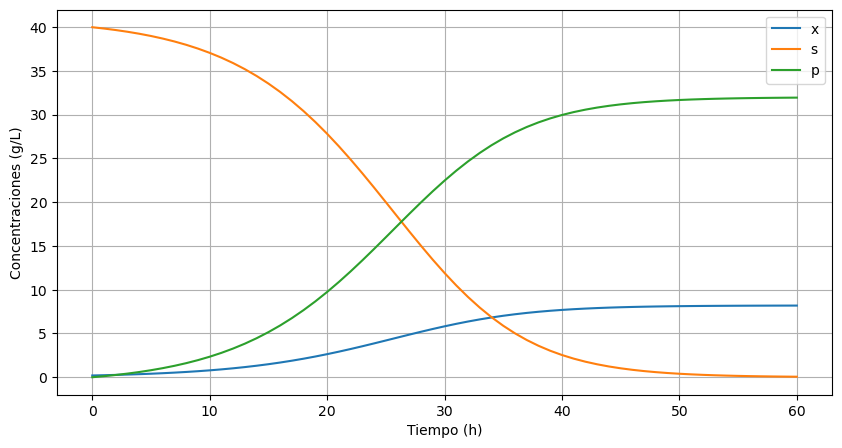

In [13]:
fn.plot_data(predicted)

In [14]:
predicted_noise = fn.add_noise(predicted, 0.1, 1, 1)

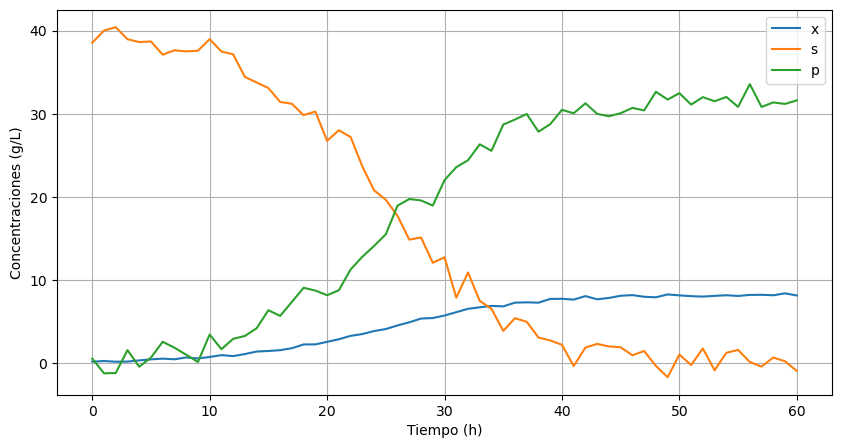

In [15]:
fn.plot_data(predicted_noise)

In [16]:
#@title load data
# data = {'t': [], 'x':[], 's':[], 'p':[]}
# with open("simulation_data.csv", "r") as f:
#     print(f.readline())
#     for line in f:
#         t_d, x_d, p_d, s_d = line.split(',')
        
#         data['t'].append(int(t_d))
#         data['x'].append(float(x_d))
#         data['s'].append(float(s_d))
#         data['p'].append(float(p_d))
        
# data = pd.DataFrame(data)
# print(data.shape)
# print(predicted.shape)
# data.head()

In [17]:
def fitness_function(parms):
    mu_max, yxs, ks, ypx = parms
    x, s, p = fn.euler(fn.monod_model, x0, 0, tf+dt, dt, lambda t: 0, mu_max, yxs, ks, ypx).T
    out = fn.generate_data(time, x, s, p)
    return fn.MSE(predicted_noise, out)

In [18]:
fitness_function([mu_max, yxs, ks, ypx])

2.200337050464141

In [21]:
# Configuramos algoritmo genetico
algorithm_param = {'max_num_iteration': 100,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

In [24]:
# Establecer los rangos de busqueda para las variables de decision
varbound=np.array([
    [0,1], # mu_max
    [10,20], # ks
    [0,1], # yxs
    [10,20] # ypx
])

In [25]:
# LLamar el algortimo genetico para realizar la optimizacion
model=ga(function=fitness_function,
         dimension=4,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [ 0.05558338 10.00239733  0.95917235 11.36069191]

 Objective function:
 886.7389352130529


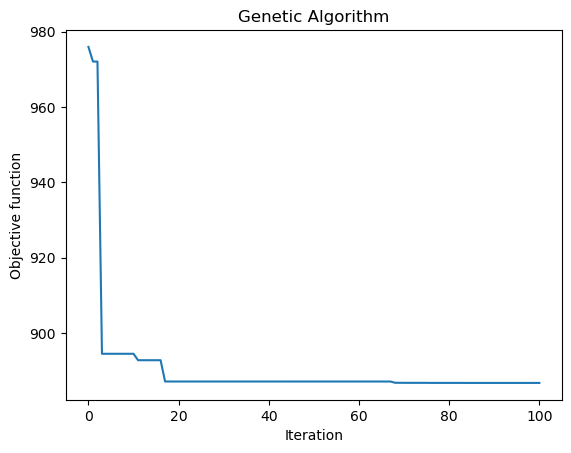

In [26]:
# Realizar la busqueda
model.run()